<center> <font size="+1"> TP3 SIC 4102 </font> </center>

# Estimateur LASSO

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def ridge(A, b, lamb):
    """ ridge(A, b, lamb)

    min. 1/2*norm(b - Ax)^2+lambda*||x||_2^2
    (wrt x)
    """
    m = A.shape[1]
    lm = A.transpose().dot(A) + lamb*np.eye(m)
    Atb = A.transpose().dot(b)
    x = np.linalg.solve(lm, Atb)
    return x

In [3]:
def soft_thresh(u, s):
    """ v = soft_thresh(u, s)

    Returns a soft-thresholding (elementwise) of u with threshold s
    v = sign(v)*maximum(0, abs(u) - s)
    """
    v = np.sign(u)*np.maximum(0, abs(u) - s)
    return v


def lasso(A, b, lamb, maxiter=5000):
    """ lasso(A, b, lamb, maxiter=500)

    min. 1/2*norm(b- Ax)^2+lambda*sum(abs(x))
    (wrt x)
    Forward-Backward algorithm
    """
    n = A.shape[1]
    gam = 1.9/np.linalg.norm(A, 2)**2

    x = np.zeros(n)
    prec = 1e-6
    crit = 0
    for nit in range(maxiter):
        Ax = A.dot(x)
        critold = crit
        crit = np.linalg.norm(Ax-b)**2/2+lamb*sum(abs(x))
        if nit > 1 and critold-crit < prec*critold:
            break
        x = x-gam*A.transpose().dot(Ax-b)
        x = soft_thresh(x, lamb*gam)
    return x

$
\newcommand{\bA}{\mathbf{A}}
\newcommand{\bx}{\mathbf{x}}
\newcommand{\by}{\mathbf{y}}
\newcommand{\be}{\mathbf{e}}
\newcommand{\RR}{\mathbb{R}}
\newcommand{\Argmin}{\mathrm{Argmin}}
\newcommand{\st}{\mathrm{s.t.}}
$

On considère le modèle d'observation suivant:
$$
\by = \bA\bx_0 + \be
$$
où $\bA\in\RR^{m\times n}$ est une matrice donnée, $\by$ est le vecteur d'observation (taille $m$), $\bx_0$ est le vecteur des vraies données à reconstituer et $\be$ est un terme de bruit perturbateur.

On suppose $m\geq n$, c'est-à-dire plus d'observations que d'inconnues.

Le but est de comparer les deux estimateurs suivants (appelés RIDGE et LASSO):
$$
\hat{\bx}_{\mathrm{ridge}}=\Argmin_\bx \|\by-\bA\bx\|_2^2+\lambda\|\bx\|_2^2 \qquad \qquad
\hat{\bx}_{\mathrm{lasso}}=\Argmin_\bx \|\by-\bA\bx\|_2^2+\lambda\|\bx\|_1 \,.
$$

Programmer la fonction `ridge(A, b, lamb)` qui renvoie la solution RIDGE ci-dessus. Une fonction `lasso(A, b, lamb)` est donnée ci-dessous (voir cours d'optimisation).

## Génération d'un signal original $\bx_0$ parcimonieux

Choisir $n$ de l'ordre de 500 et générer pour $\bx_0$ un signal parcimonieux.

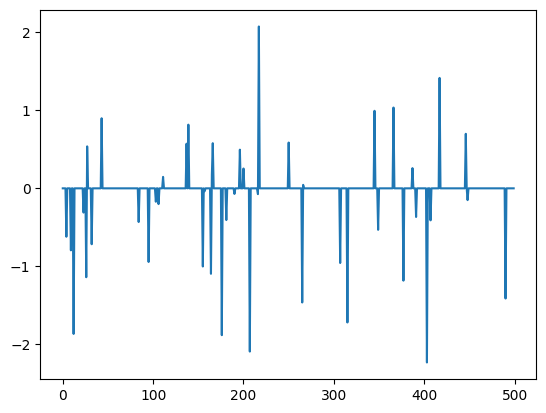

In [4]:
n=500
s = 0.1 #taux de parcimonie et signal parcimonieux
x0 = np.asarray([0 if np.random.rand()>s else np.random.randn() for i in range(n)])

Fig_x0, Ax_x0 = plt.subplots(1, 1)
Ax_x0.plot(x0)

## Génération d'observations

Générer une matrice $m\times n$ aléatoire, puis observations bruitées selon $\by=\bA\bx_0 + \be$ (on pourra prendre $n=m$ et faire varier le niveau de bruit).

Text(0.5, 1.0, 'y : observations bruitees')

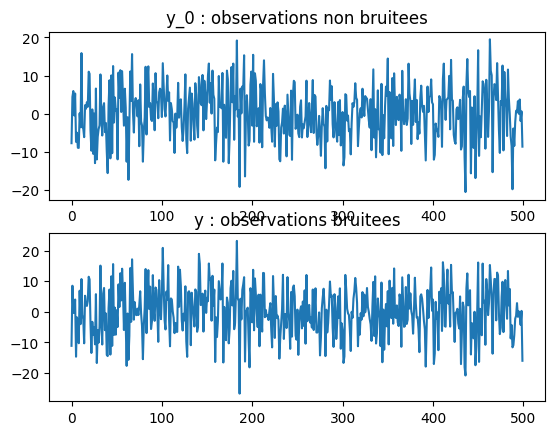

In [5]:
m = n
A = np.random.randn(m,n)
y0 = A.dot(x0)
#### ajout de bruit sur les observations
Py = (y0**2).sum()/m
snr_dB = +10
sigma_e = np.sqrt(Py*np.exp(-snr_dB/10))
e = sigma_e*np.random.randn(m)
y = y0 + e

Fig_donnees, Ax_donnees = plt.subplots(2, 1)
Ax_donnees[0].plot(y0)
Ax_donnees[0].set_title('y_0 : observations non bruitees')
Ax_donnees[1].plot(y)
Ax_donnees[1].set_title('y : observations bruitees')

## Reconstruction LASSO versus RIDGE

Tester les estimateurs RIDGE et LASSO, faire varier les paramètres, comparer et commenter.

norm(x0-xlasso): 2.335 	 norm(x0-xridge): 7.396


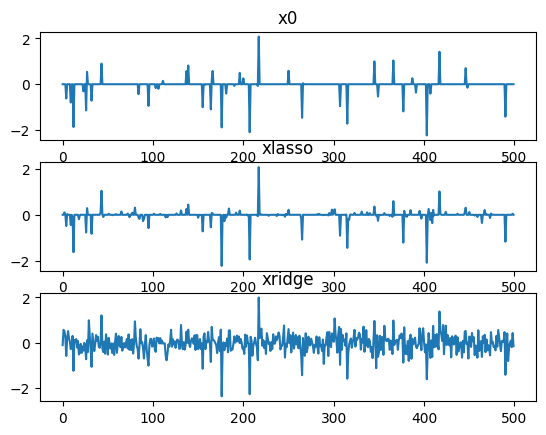

In [6]:
lamblasso = 100
xlasso = lasso(A, y, lamblasso)
lambridge = 10
xridge = ridge(A, y, lambridge)

Fig_lasso, Ax_lasso = plt.subplots(3, 1)
Ax_lasso[0].plot(x0)
Ax_lasso[0].set_title('x0')
Ax_lasso[1].plot(xlasso)
Ax_lasso[1].set_title('xlasso')
Ax_lasso[2].plot(xridge)
Ax_lasso[2].set_title('xridge')

print(f"norm(x0-xlasso): {np.linalg.norm(x0-xlasso):.3f} \t norm(x0-xridge): {np.linalg.norm(x0-xridge):.3f}")